In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress
import numpy as np

#file path
co2_path = "data\\Atmospheric_CO%E2%82%82_Concentrations.csv"

#read csv file into dataframe
co2_csv = pd.read_csv(co2_path)

In [7]:
co2_csv

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,Date,Value
0,1,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate Indicator...",1958M03,315.70
1,2,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate Indicator...",1958M04,317.45
2,3,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate Indicator...",1958M05,317.51
3,4,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate Indicator...",1958M06,317.24
4,5,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate Indicator...",1958M07,315.86
...,...,...,...,...,...,...,...,...,...,...,...,...
1549,1550,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate Indicator...",2023M03,0.52
1550,1551,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate Indicator...",2023M04,423.36
1551,1552,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate Indicator...",2023M04,0.74
1552,1553,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate Indicator...",2023M05,424.00


In [8]:
# filter out rows where the word percent is present 
filtered_co2_csv = co2_csv[~co2_csv['Unit'].str.contains('Percent', case=False)]
filtered_co2_csv['Year'] = filtered_co2_csv['Date'].str[:4]

C:\Users\zombi\AppData\Local\Temp\ipykernel_36532\3957672888.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_co2_csv['Year'] = filtered_co2_csv['Date'].str[:4]


In [9]:
#create a 10 year cycle
filtered_co2_csv['10_year_cycle'] = (filtered_co2_csv['Year'].astype(int) // 10) * 10

average_year = filtered_co2_csv.groupby(['Year'])['Value'].mean().reset_index()
average_year

C:\Users\zombi\AppData\Local\Temp\ipykernel_36532\209876903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_co2_csv['10_year_cycle'] = (filtered_co2_csv['Year'].astype(int) // 10) * 10


,Year,Value
0,1958,315.232000
1,1959,315.980833
2,1960,316.910000
3,1961,317.644167
4,1962,318.454167
...,...,...
61,2019,411.654167
62,2020,414.238333
63,2021,416.450833
64,2022,418.564167


In [10]:
date_intervals = []

for cycle, group in filtered_co2_csv.groupby('10_year_cycle'):
    start_year = group['Year'].min()
    end_year = group['Year'].max()
    date_intervals.append(f"{start_year}-{end_year}")
    
print("10-Year Intervals:")
for interval in date_intervals:
    print(interval)

10-Year Intervals:
1958-1959
1960-1969
1970-1979
1980-1989
1990-1999
2000-2009
2010-2019
2020-2023


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


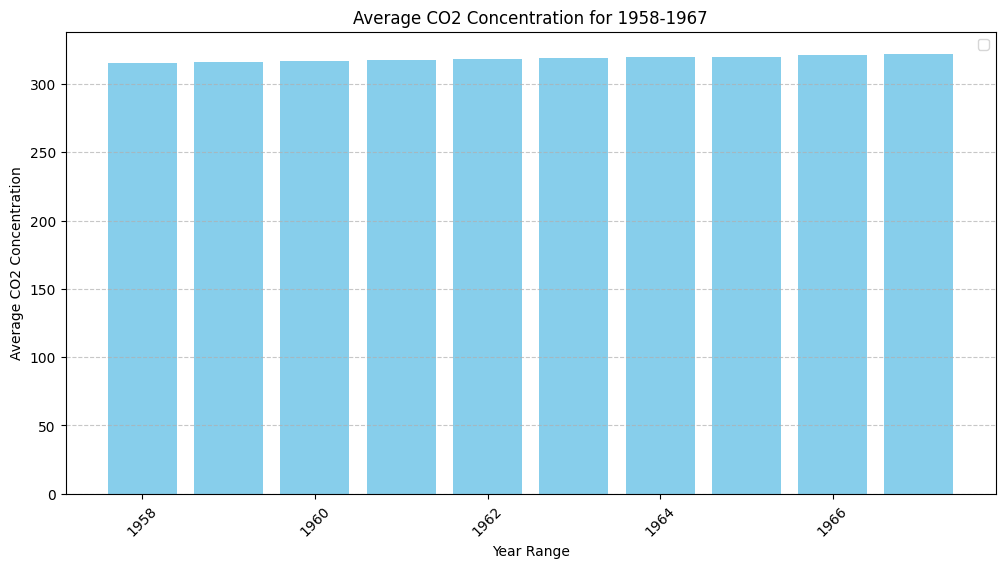

In [11]:
average_year['Year'] = average_year['Year'].astype(int)
start_year = 1958
end_year = 1967

mask = (average_year['Year'] >= start_year) & (average_year['Year'] <= end_year)
selected_data = average_year[mask]

plt.figure(figsize=(12,6))
plt.bar(selected_data['Year'], selected_data['Value'], color='skyblue')
plt.title('Average CO2 Concentration for 1958-1967')
plt.xlabel('Year Range')
plt.ylabel('Average CO2 Concentration')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('average_co2_concentration.png')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


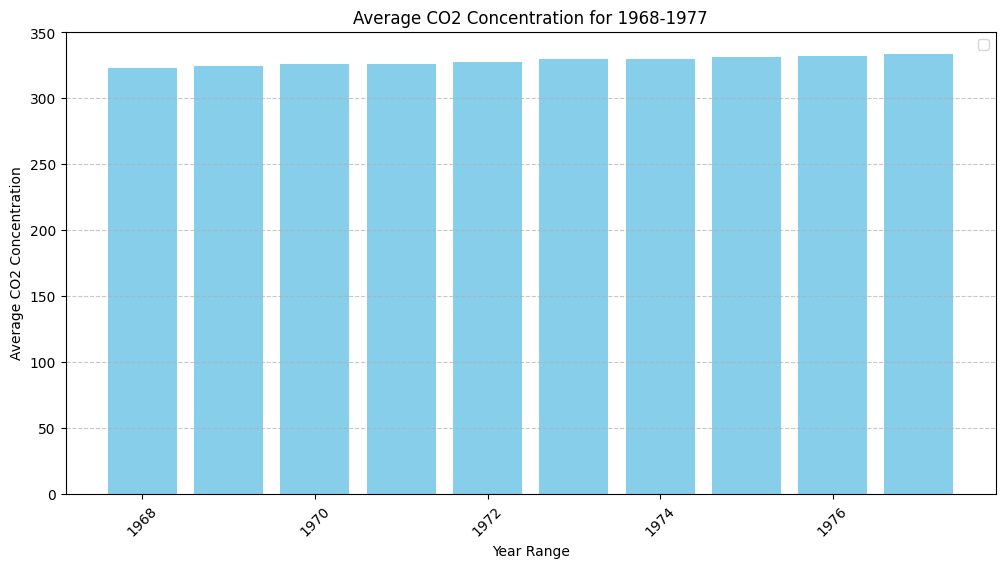

In [12]:

start_year = 1968
end_year = 1977

mask = (average_year['Year'] >= start_year) & (average_year['Year'] <= end_year)
selected_data = average_year[mask]

plt.figure(figsize=(12,6))
plt.bar(selected_data['Year'], selected_data['Value'], color='skyblue')
plt.title('Average CO2 Concentration for 1968-1977')
plt.xlabel('Year Range')
plt.ylabel('Average CO2 Concentration')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('average_co2_concentration_1968-1977.png')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


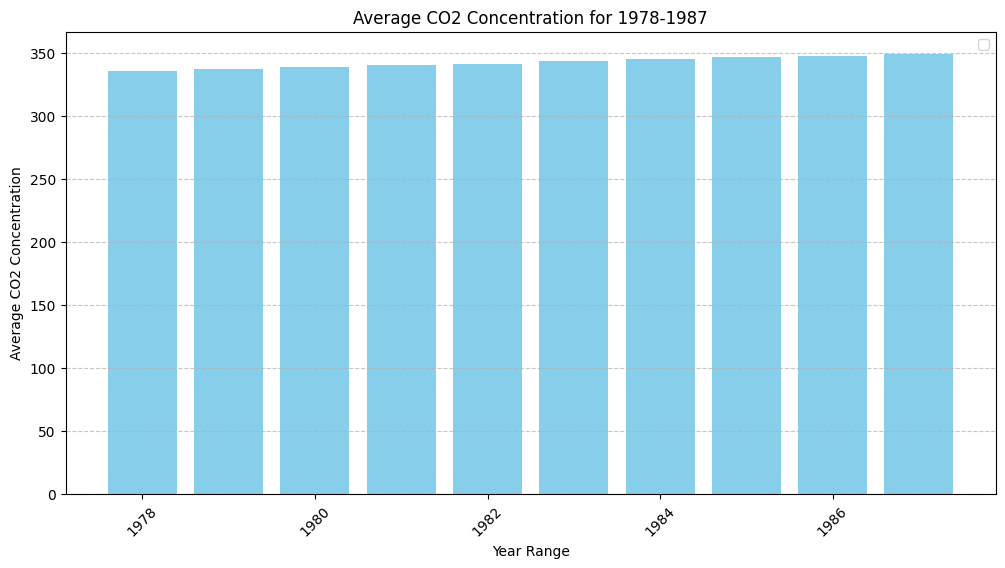

In [13]:

start_year = 1978
end_year = 1987

mask = (average_year['Year'] >= start_year) & (average_year['Year'] <= end_year)
selected_data = average_year[mask]

plt.figure(figsize=(12,6))
plt.bar(selected_data['Year'], selected_data['Value'], color='skyblue')
plt.title('Average CO2 Concentration for 1978-1987')
plt.xlabel('Year Range')
plt.ylabel('Average CO2 Concentration')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('average_co2_concentration_1978-1987.png')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


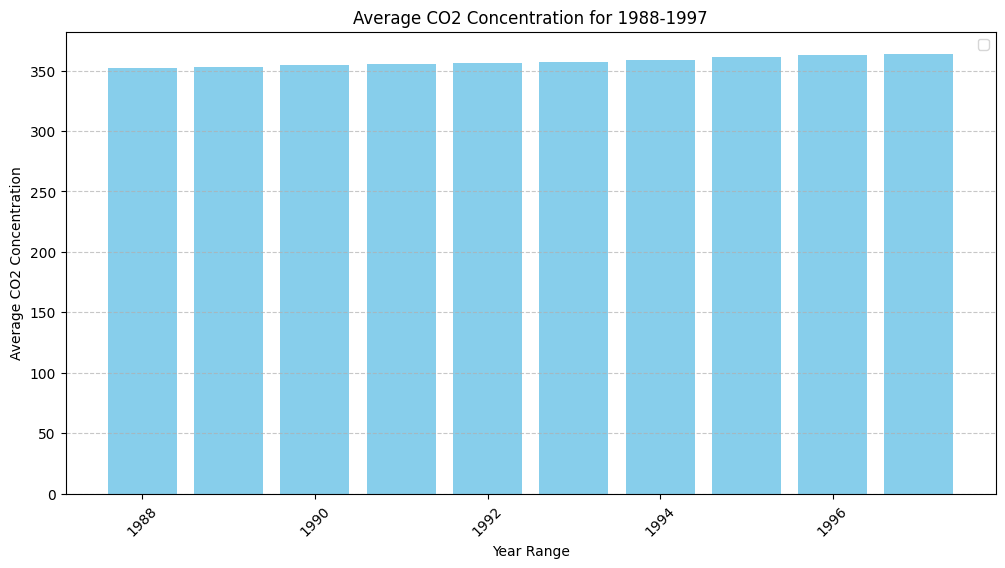

In [14]:

start_year = 1988
end_year = 1997

mask = (average_year['Year'] >= start_year) & (average_year['Year'] <= end_year)
selected_data = average_year[mask]

plt.figure(figsize=(12,6))
plt.bar(selected_data['Year'], selected_data['Value'], color='skyblue')
plt.title('Average CO2 Concentration for 1988-1997')
plt.xlabel('Year Range')
plt.ylabel('Average CO2 Concentration')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('average_co2_concentration_1988-1997.png')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


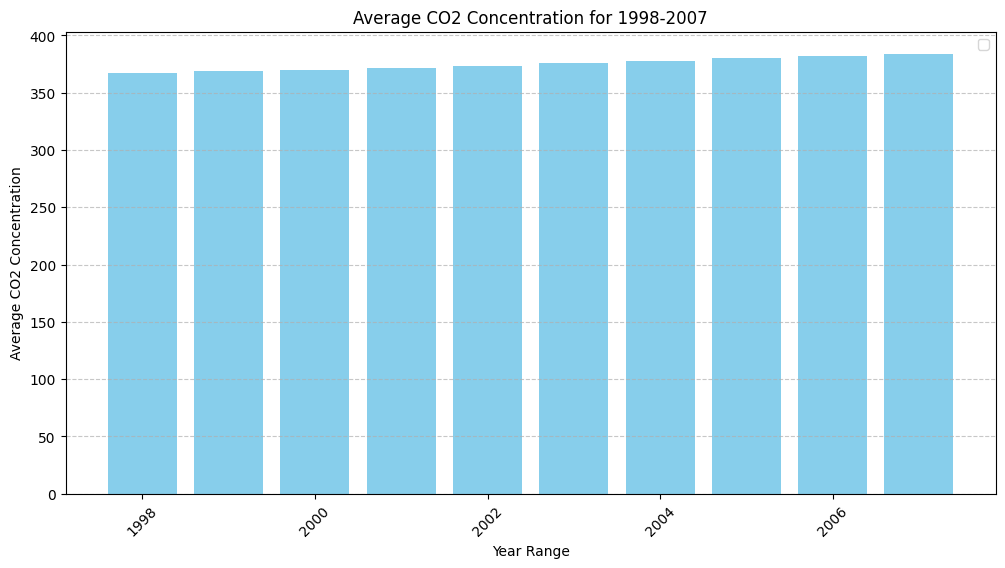

In [15]:

start_year = 1998
end_year = 2007

mask = (average_year['Year'] >= start_year) & (average_year['Year'] <= end_year)
selected_data = average_year[mask]

plt.figure(figsize=(12,6))
plt.bar(selected_data['Year'], selected_data['Value'], color='skyblue')
plt.title('Average CO2 Concentration for 1998-2007')
plt.xlabel('Year Range')
plt.ylabel('Average CO2 Concentration')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('average_co2_concentration_1998-2007.png')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


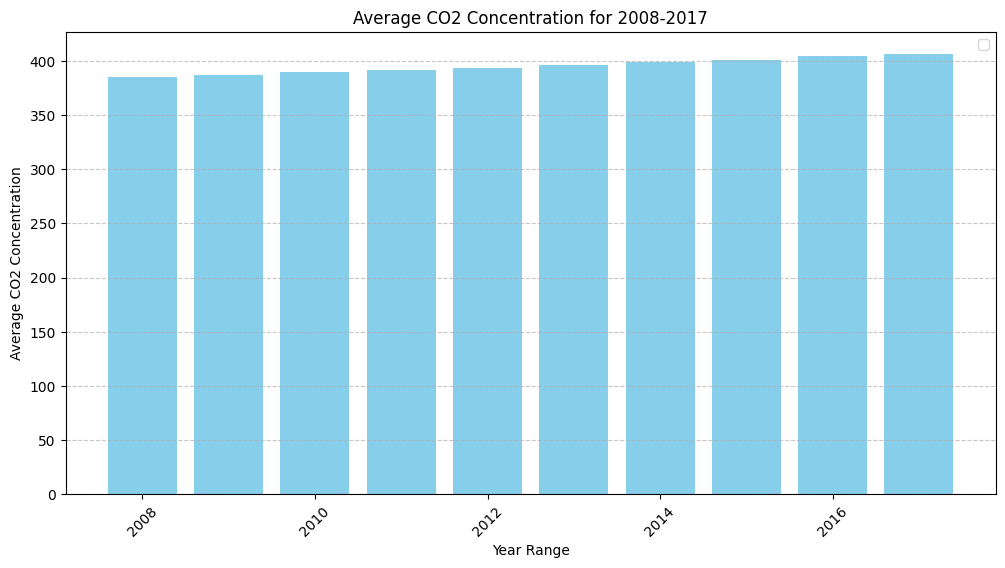

In [16]:

start_year = 2008
end_year = 2017

mask = (average_year['Year'] >= start_year) & (average_year['Year'] <= end_year)
selected_data = average_year[mask]

plt.figure(figsize=(12,6))
plt.bar(selected_data['Year'], selected_data['Value'], color='skyblue')
plt.title('Average CO2 Concentration for 2008-2017')
plt.xlabel('Year Range')
plt.ylabel('Average CO2 Concentration')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('average_co2_concentration_2008-2017.png')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


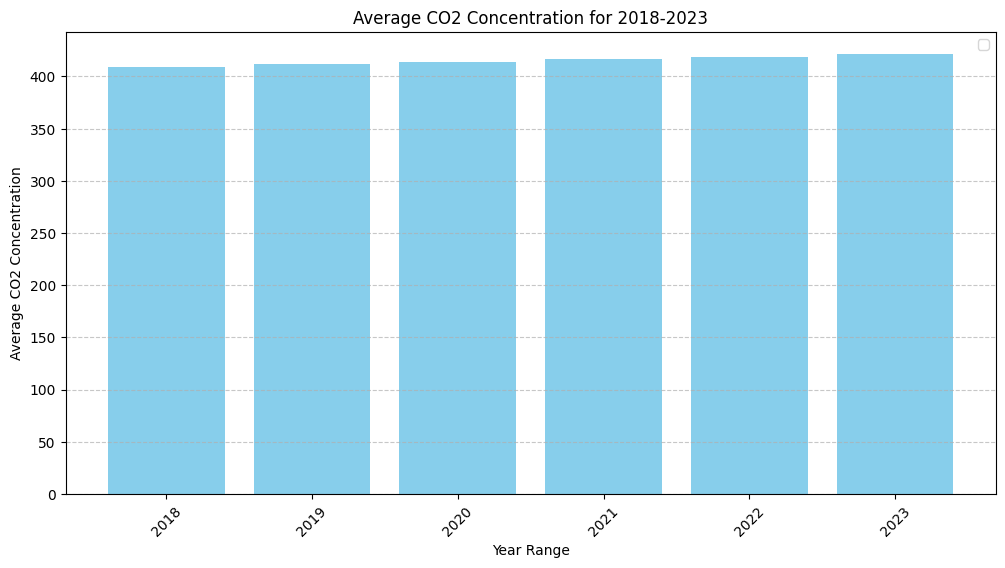

In [17]:
start_year = 2018
end_year = 2023

mask = (average_year['Year'] >= start_year) & (average_year['Year'] <= end_year)
selected_data = average_year[mask]

plt.figure(figsize=(12,6))
plt.bar(selected_data['Year'], selected_data['Value'], color='skyblue')
plt.title('Average CO2 Concentration for 2018-2023')
plt.xlabel('Year Range')
plt.ylabel('Average CO2 Concentration')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('average_co2_concentration_2018-2023.png')
plt.show()


C:\Users\zombi\AppData\Local\Temp\ipykernel_36532\602452474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_co2_csv['Year'] = filtered_co2_csv['Year'].astype(int)


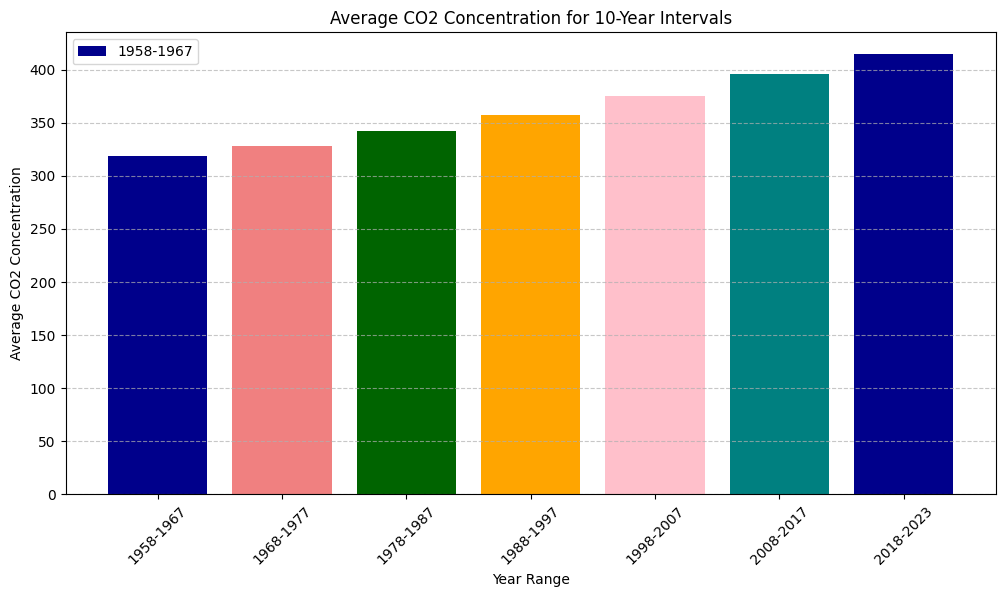

In [18]:
filtered_co2_csv['Year'] = filtered_co2_csv['Year'].astype(int)
year_ranges = [(1958, 1967), (1968, 1977), (1978, 1987), (1988, 1997), (1998, 2007), (2008, 2017), (2018, 2023)]

colors = ['darkblue', 'lightcoral', 'darkgreen', 'orange', 'pink', 'teal']
average_values = []
for start_year, end_year in year_ranges:
    mask= (filtered_co2_csv['Year'] >= start_year) & (filtered_co2_csv['Year'] <= end_year)
    average_value = filtered_co2_csv[mask]['Value'].mean()
    average_values.append(average_value)
    
plt.figure(figsize=(12,6))
year_range_labels = [f'{start}-{end}' for start, end in year_ranges]
plt.bar(year_range_labels, average_values, color=colors)
plt.title('Average CO2 Concentration for 10-Year Intervals')
plt.xlabel('Year Range')
plt.ylabel('Average CO2 Concentration')
plt.xticks(rotation=45)

legend = [f'{start}-{end}' for start, end in year_ranges]
plt.legend(legend)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('average_co2_concentration_10-Years.png')
plt.show()


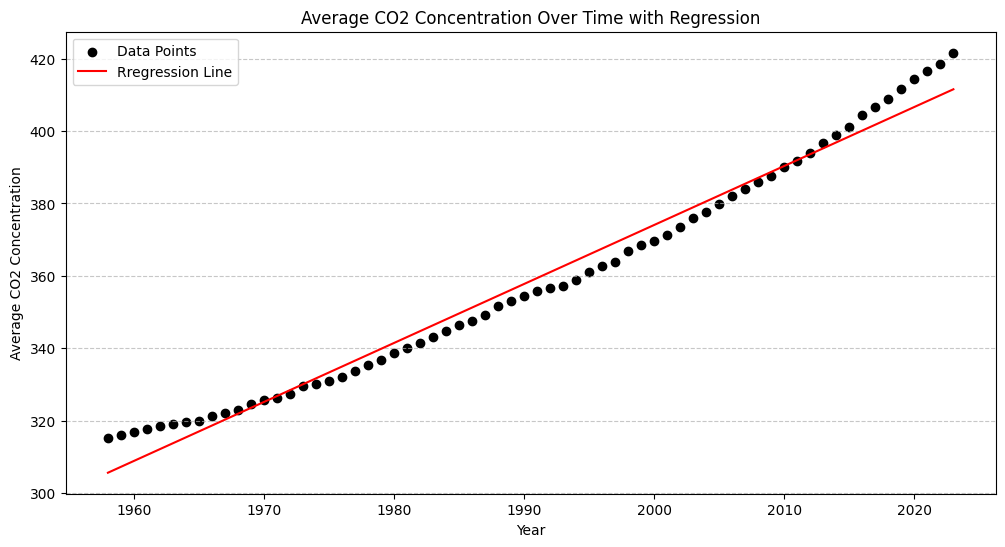

In [19]:
plt.figure(figsize=(12,6))
plt.scatter(average_year['Year'], average_year['Value'], label='Data Points', color='black')

#linear regression
slope, intercept, r_value, p_value, std_err = linregress(average_year['Year'], average_year['Value'])
regress_line = slope * average_year['Year'] + intercept

#plot regression
plt.plot(average_year['Year'], regress_line, label='Rregression Line', color='red')

plt.title('Average CO2 Concentration Over Time with Regression')
plt.xlabel('Year')
plt.ylabel('Average CO2 Concentration')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('average_co2_concentration_scatterplot.png')
plt.show()
